# Chargement des données

In [ ]:
#Nous allons travailler sur une population de photos de chiens et chats. Nous avons utilisé différentes méthodes de 

In [3]:
#On charge les training data et des test data avant des les exploiter
from utilities import *
X, y, Xtest, yt = load_data() 

In [4]:
print(X.shape,y.shape) #On a 1000 photos de 64*64 pixels
print(np.unique(y,return_counts=True)) #500 photos de chats, 500 photos de chiens

(1000, 64, 64) (1000, 1)
(array([0., 1.]), array([500, 500]))


In [5]:
print(Xtest.shape,yt.shape) #On a plus 200 photos de test

(200, 64, 64) (200, 1)


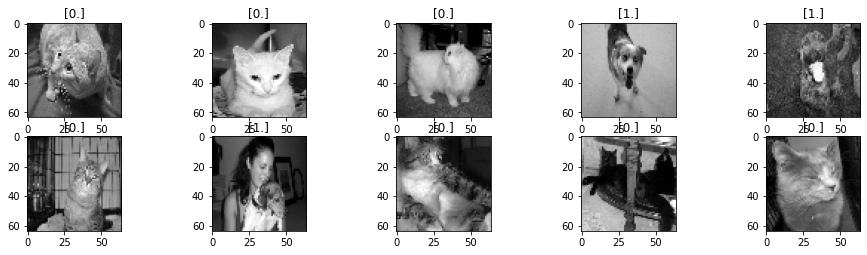

In [14]:
#On affiche quelques photos pour voir que ce sont bien des chats et chiens
def affichage(a):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))
    for i in range(1,a+1):
        plt.subplot(4,5,i)
        plt.imshow(X[i],cmap='gray')
        plt.title(y[i])
    return plt.show()

In [ ]:
# Une fois aplatie, chaque photo est un vecteur de 4096 pixels, 
# donc 4096 variables qui prennent des valeurs entre 0 et 255 (1 pixel = 8 bits)
# On commence donc par applatir nos images pour en faire un vecteur de 1000 lignes et 4096 caractéristiques
Xr=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X_train = Xr/255

Xt=Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2])
X_test = Xt/255
print(X_train.shape,X_test.shape)

In [ ]:
def Florian('afficher le nombre de photo'):
    return affichage(a)
